<h1>Sacramento's Best Trails</h1>
<h2>Data Visualization and Analysis</h2>
<h3>Variable 3: Difficulty</h3>
<em>by:</em> Joy, Ruben, and Nancy

<h3>Step 1: Review the project outline</h3>

> Our project is to identify the factors that influence people's preference in hiking trails. We'll examine trails available within a 150 mile radius of Sacramento; <u>find variables that affect ratings and which of these have the strongest relationship with trail ratings</u>. <br>By identifying these correlations, our findings could help people identify other highly rated trails outside of the original scope.

<h3>Step 2: Dependencies and Setup</h3>

In [88]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import gmaps
import ipywidgets as widgets

# Import API key
# Google API
from config import g_key

<h3>Step 3: Importing data from CSV</h3>

In [89]:
data = pd.read_csv("trails_dropped.csv")
#Removing first column (index)
data.drop(data.columns[0],axis=1,inplace=True)

>Let's see what we have here.

In [90]:
data.head()

,id,name,type,summary,difficulty,stars,starVotes,location,length,ascent,descent,high,low,longitude,latitude,conditionStatus,conditionDetails,conditionDate,popular_vote
0,7021990,Seasonal Wetland Loop,Hike,A scenic loop around one of the wetland areas ...,Easy,3.5,2,"Davis, California",3.1,10,-12,17,11,-121.6261,38.5505,Unknown,NaN,1970-01-01 00:00:00,7.0
1,7089186,Nature Loop,Hike,A common loop that explores the park.,Easy/Intermediate,5.0,1,"Carmichael, California",1.6,21,-20,77,69,-121.3127,38.6168,Unknown,NaN,1970-01-01 00:00:00,5.0
2,7023706,Cosumnes Nature Loop,Hike,A nature-watcher's delight that follows trails...,Easy,4.0,9,"Thornton, California",4.0,88,-84,51,9,-121.4403,38.2657,Unknown,NaN,1970-01-01 00:00:00,36.0
3,7016942,Lake Natoma Loop,Hike,Hike around Lake Natoma on bike paths with an ...,Easy/Intermediate,4.2,9,"Folsom, California",12.0,293,-294,194,110,-121.1804,38.6766,Unknown,NaN,1970-01-01 00:00:00,37.8
4,7027546,Traylor Ranch Bird Sanctuary,Hike,There are lots of birds to see and lots of loo...,Easy,2.0,3,"Loomis, California",3.2,65,-65,430,396,-121.2058,38.8485,Unknown,NaN,1970-01-01 00:00:00,6.0


<h3>Step 3: Creating new variables for analysis</h3>

> Now, we want to see if there is actually a strong relationship between DIFFICULTY and RATING. We want to use the <i>correlation coefficient</i> to identify this.<br><br>We will need our "difficulty" column to be a number value for the computation to work. <br>Let's add a new column called <b>"difficulty_level"</b> and fill it in with numeric values

In [91]:
#Dropping rows that don't have a valid value inside the difficulty column
indexNames = data[ (data['difficulty'] == 'missing') ].index
data.drop(indexNames , inplace=True)

data.loc[(data.difficulty == 'Easy'),'difficulty_level']=1
data.loc[(data.difficulty == 'Easy/Intermediate'),'difficulty_level']=2
data.loc[(data.difficulty == 'Intermediate'),'difficulty_level']=3
data.loc[(data.difficulty == 'Intermediate/Difficult'),'difficulty_level']=4
data.loc[(data.difficulty == 'Difficult'),'difficulty_level']=5
data.loc[(data.difficulty == 'Extremely Difficult'),'difficulty_level']=6

data['difficulty_level'] = data['difficulty_level'].astype('int32')

>Let's preview our new dataframe

In [92]:
data.head()

,id,name,type,summary,difficulty,stars,starVotes,location,length,ascent,descent,high,low,longitude,latitude,conditionStatus,conditionDetails,conditionDate,popular_vote,difficulty_level
0,7021990,Seasonal Wetland Loop,Hike,A scenic loop around one of the wetland areas ...,Easy,3.5,2,"Davis, California",3.1,10,-12,17,11,-121.6261,38.5505,Unknown,NaN,1970-01-01 00:00:00,7.0,1
1,7089186,Nature Loop,Hike,A common loop that explores the park.,Easy/Intermediate,5.0,1,"Carmichael, California",1.6,21,-20,77,69,-121.3127,38.6168,Unknown,NaN,1970-01-01 00:00:00,5.0,2
2,7023706,Cosumnes Nature Loop,Hike,A nature-watcher's delight that follows trails...,Easy,4.0,9,"Thornton, California",4.0,88,-84,51,9,-121.4403,38.2657,Unknown,NaN,1970-01-01 00:00:00,36.0,1
3,7016942,Lake Natoma Loop,Hike,Hike around Lake Natoma on bike paths with an ...,Easy/Intermediate,4.2,9,"Folsom, California",12.0,293,-294,194,110,-121.1804,38.6766,Unknown,NaN,1970-01-01 00:00:00,37.8,2
4,7027546,Traylor Ranch Bird Sanctuary,Hike,There are lots of birds to see and lots of loo...,Easy,2.0,3,"Loomis, California",3.2,65,-65,430,396,-121.2058,38.8485,Unknown,NaN,1970-01-01 00:00:00,6.0,1


>Looks good. Let's calculate our coeffients!

In [82]:
data.corr()

,id,stars,starVotes,length,ascent,descent,high,low,longitude,latitude,popular_vote,difficulty_level
id,1.000000,-0.314129,-0.309658,-0.174984,-0.164342,0.183894,-0.199713,-0.168481,-0.050760,0.110909,-0.294572,0.006346
stars,-0.314129,1.000000,0.272954,0.473367,0.454300,-0.460620,0.399062,0.309463,0.071202,-0.286414,0.263855,0.423264
starVotes,-0.309658,0.272954,1.000000,0.141192,0.222686,-0.232852,0.247193,0.194453,0.193028,-0.176927,0.998469,0.127872
length,-0.174984,0.473367,0.141192,1.000000,0.844851,-0.853123,0.419908,0.252827,0.167056,-0.178758,0.141690,0.375774
ascent,-0.164342,0.454300,0.222686,0.844851,1.000000,-0.938298,0.538892,0.312289,0.207163,-0.189902,0.227534,0.524041
descent,0.183894,-0.460620,-0.232852,-0.853123,-0.938298,1.000000,-0.520969,-0.300591,-0.211004,0.199060,-0.237829,-0.533575
high,-0.199713,0.399062,0.247193,0.419908,0.538892,-0.520969,1.000000,0.961024,0.723266,0.104041,0.249164,0.395600
low,-0.168481,0.309463,0.194453,0.252827,0.312289,-0.300591,0.961024,1.000000,0.763212,0.173517,0.194501,0.258051
longitude,-0.050760,0.071202,0.193028,0.167056,0.207163,-0.211004,0.723266,0.763212,1.000000,0.286228,0.193053,0.094042
latitude,0.110909,-0.286414,-0.176927,-0.178758,-0.189902,0.199060,0.104041,0.173517,0.286228,1.000000,-0.170523,-0.107466


>Well, these are some really low values :(<br><br> Since our correlation coefficient for difficulty and popular vote presents a low value of <b>0.13</b>, we can say that <i>there is no strong relationship between the variables - difficulty and rating</i>

<h3> But wait! We can still have some fun with our data</h3>

>Let's try to see how diverse the trails are in the area. Everyone likes options, right?

In [70]:
#Forming new dataframes based on difficulty
easyTrails = data[(data['difficulty']=='Easy')]
easyIntermediateTrails = data[(data['difficulty']=='Easy/Intermediate')]
intermediateTrails = data[(data['difficulty']=='Intermediate')]
intermediateDifficultTrails = data[(data['difficulty']=='Intermediate/Difficult')]
difficultTrails = data[(data['difficulty']=='Difficult')]
extremeDifficultTrails = data[(data['difficulty']=='Extremely Difficult')]

In [93]:
#Counting number of trails and grouping them based on ratings (stars)

easy1 = len(easyTrails[(easyTrails.stars >= 0) & (easyTrails.stars <= 2.99)])
easy2 = len(easyTrails[(easyTrails.stars >= 3) & (easyTrails.stars <= 3.99)])
easy3 = len(easyTrails[(easyTrails.stars >= 4) & (easyTrails.stars <= 4.99)])
easy4 = len(easyTrails[(easyTrails.stars >= 5)])

easyIntermediate1 = len(easyIntermediateTrails[(easyIntermediateTrails.stars >= 0) & (easyIntermediateTrails.stars <= 2.99)])
easyIntermediate2 = len(easyIntermediateTrails[(easyIntermediateTrails.stars >= 3) & (easyIntermediateTrails.stars <= 3.99)])
easyIntermediate3 = len(easyIntermediateTrails[(easyIntermediateTrails.stars >= 4) & (easyIntermediateTrails.stars <= 4.99)])
easyIntermediate4 = len(easyIntermediateTrails[(easyIntermediateTrails.stars >= 5)])

intermediate1 = len(intermediateTrails[(intermediateTrails.stars >= 0) & (intermediateTrails.stars <= 2.99)])
intermediate2 = len(intermediateTrails[(intermediateTrails.stars >= 3) & (intermediateTrails.stars <= 3.99)])
intermediate3 = len(intermediateTrails[(intermediateTrails.stars >= 4) & (intermediateTrails.stars <= 4.99)])
intermediate4 = len(intermediateTrails[(intermediateTrails.stars >= 5)])

intermediateDifficult1 = len(intermediateDifficultTrails[(intermediateDifficultTrails.stars >= 0) & (intermediateDifficultTrails.stars <= 2.99)])
intermediateDifficult2 = len(intermediateDifficultTrails[(intermediateDifficultTrails.stars >= 3) & (intermediateDifficultTrails.stars <= 3.99)])
intermediateDifficult3 = len(intermediateDifficultTrails[(intermediateDifficultTrails.stars >= 4) & (intermediateDifficultTrails.stars <= 4.99)])
intermediateDifficult4 = len(intermediateDifficultTrails[(intermediateDifficultTrails.stars >= 5)])

difficult1 = len(difficultTrails[(difficultTrails.stars >= 0) & (difficultTrails.stars <= 2.99)])
difficult2 = len(difficultTrails[(difficultTrails.stars >= 3) & (difficultTrails.stars <= 3.99)])
difficult3 = len(difficultTrails[(difficultTrails.stars >= 4) & (difficultTrails.stars <= 4.99)])
difficult4 = len(difficultTrails[(difficultTrails.stars >= 5)])

extremelyDifficult1 = len(extremeDifficultTrails[(extremeDifficultTrails.stars >= 0) & (extremeDifficultTrails.stars <= 2.99)])
extremelyDifficult2 = len(extremeDifficultTrails[(extremeDifficultTrails.stars >= 3) & (extremeDifficultTrails.stars <= 3.99)])
extremelyDifficult3 = len(extremeDifficultTrails[(extremeDifficultTrails.stars >= 4) & (extremeDifficultTrails.stars <= 4.99)])
extremelyDifficult4 = len(extremeDifficultTrails[(extremeDifficultTrails.stars >= 5)])

In [98]:
#Creating our graph
category_names = ['0 - 2.99', '3.0 - 3.9', '4.0 - 4.99', '5+']
results = {
    'Easy': [easy1, easy2, easy3, easy4],
    'Easy/Intermediate': [easyIntermediate1, easyIntermediate2, easyIntermediate3, easyIntermediate4],
    'Intermediate': [intermediate1, intermediate2, intermediate3, intermediate4],
    'Intermediate/Difficult': [intermediateDifficult1, intermediateDifficult2, intermediateDifficult3, intermediateDifficult4],
    'Difficult': [difficult1, difficult2, difficult3, difficult4],
    'Extremely Difficult': [extremelyDifficult1, extremelyDifficult2, extremelyDifficult3, extremelyDifficult4]
}

def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.6,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='large')

    return fig, ax

> ### Difficulty Levels
>
> <b><font>EASY</b>: No obstacles. Flat. <br>
> <b><font>EASY/INTERMEDIATE</b>: Some sections of uneven terrain. Mostly flat. <br>
> <b><font>INTERMEDIATE</b>: Uneven terrain. Small inclines (max 10% grade). <br>
> <b><font>INTERMEDIATE/DIFFICULT</b>: Some obstacles such as rocks or roots present. Moderate inclines. <br>
> <b><font>DIFFICULT</b>: Tricky terrain. Steep. Not for beginners (max 15% grade). <br>
> <b>EXTREMELY DIFFICULT</b>: Potentially hazardous terrain. Very steep. Experts only. <br>

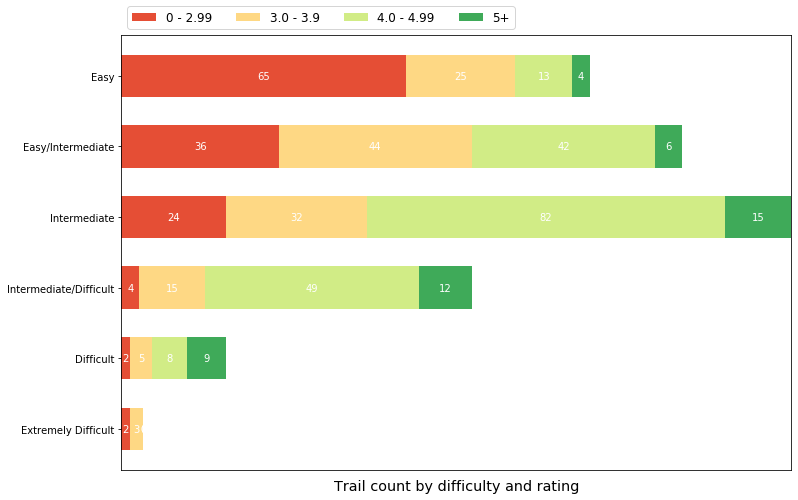

In [103]:
survey(results, category_names)
plt.title('Trail count by difficulty and rating', y=-0.06, fontsize='x-large')
plt.savefig("Resources/TrailCountByDifficulty.png")
plt.show()

>This shows that most of our trails (<b>57%</b> of data) are of easy/intermediate and intermediate. These kind of trails should be able to welcome most skill levels. Also, <b>68%</b> of it have at least a 4-star rating!


This finding proves that Sacramento can offer a good number of trail options that will make it easy for people who are trying to make hiking a hobby or a regular activity and it makes it a perfect location for either just a weekend adventure with the family or training for something more challenging!

<h4>Let's see them on the map!</h4>

In [100]:
# Access maps with unique API key
gmaps.configure(api_key=g_key)

In [101]:
# Customize the size of the figure
figure_layout = {
    'width': '800px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

In [102]:
#Add the layers

#easyTrails = GREEN
coordinates = easyTrails[["latitude", "longitude"]].astype(float)
easyTrails_layer = gmaps.symbol_layer(coordinates, fill_color = "green", stroke_color="green", scale = 2)
fig.add_layer(easyTrails_layer)

#easyIntermediateTrails = YELLOW GREEN
coordinates = easyIntermediateTrails[["latitude", "longitude"]].astype(float)
easyIntermediateTrails_layer = gmaps.symbol_layer(coordinates, fill_color = (191,230,0), stroke_color=(191,230,0), scale = 2)
fig.add_layer(easyIntermediateTrails_layer)

#intermediateTrails = YELLOW
coordinates = intermediateTrails[["latitude", "longitude"]].astype(float)
intermediateTrails_layer = gmaps.symbol_layer(coordinates, fill_color = (255,255,51), stroke_color=(255,255,51), scale = 2)
fig.add_layer(intermediateTrails_layer)

#intermediateDifficultTrails = ORANGE
coordinates = intermediateDifficultTrails[["latitude", "longitude"]].astype(float)
intermediateDifficultTrails_layer = gmaps.symbol_layer(coordinates, fill_color = (255,126,0), stroke_color=(255,126,0), scale = 2)
fig.add_layer(intermediateDifficultTrails_layer)

#difficultTrails = RED
coordinates = difficultTrails[["latitude", "longitude"]].astype(float)
difficultTrails_layer = gmaps.symbol_layer(coordinates, fill_color = (255,0,0), stroke_color=(255,0,0), scale = 2)
fig.add_layer(difficultTrails_layer)

#extremeDifficultTrails = BLACK
coordinates = extremeDifficultTrails[["latitude", "longitude"]].astype(float)
extremeDifficultTrails_layer = gmaps.symbol_layer(coordinates, fill_color = "black", stroke_color="black", scale = 2)
fig.add_layer(extremeDifficultTrails_layer)


> ### Difficulty Levels
>
> <b><font color=green>EASY</b>: No obstacles. Flat. <br>
> <b><font color=yellowgreen>EASY/INTERMEDIATE</b>: Some sections of uneven terrain. Mostly flat. <br>
> <b><font color=yellow>INTERMEDIATE</b>: Uneven terrain. Small inclines (max 10% grade). <br>
> <b><font color=orange>INTERMEDIATE/DIFFICULT</b>: Some obstacles such as rocks or roots present. Moderate inclines. <br>
> <b><font color=red>DIFFICULT</b>: Tricky terrain. Steep. Not for beginners (max 15% grade). <br>
> <b>EXTREMELY DIFFICULT</b>: Potentially hazardous terrain. Very steep. Experts only. <br>

In [81]:
#Show figure
fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…

><b>The greater Sacramento area are composed of mostly EASY-EASY/INTERMEDIATE trails.</b> 
<br>And of course, we will see more of a variety of difficulty level as we head towards the Sierra. 